In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#  Part1: Data Reading 

In [3]:
EmData= pd.read_csv('Spam.csv',encoding='cp1252',dtype={'type':np.str, 'Email_body':np.str})

In [4]:
EmData=EmData[['type','Email_body']]

In [5]:
EmData['type_num']= EmData.type.map({'ham':0, 'spam':1})

# Part2: Data Splitting

In [6]:
y = EmData.type_num
X = EmData.Email_body


In [7]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1) 
    
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X.shape

(5572,)

In [9]:
print(X_train.shape,y_train.shape)

(3342,) (3342,)


In [10]:
print(X_test.shape,y_test.shape)

(1115,) (1115,)


In [11]:
print(X_val.shape, y_val.shape)

(1115,) (1115,)


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


The following section performs text preprocessing with tokenizing and filtering of stop words using CountVectorizer(). It converts the input text into a feature vector!

In [13]:
cv = CountVectorizer()

In [14]:
X_train_counts=cv.fit_transform(X_train)

Counting the occouance of the documents'words results with a sparse matrix of number of documents "Entries" * counts of the number of words in each entry

In [15]:
X_train_counts.shape

(3342, 6621)

Even though counting the words' occuance is a good technique of feature extraction, it may have some bias resulting from the variation of the documents' length. 
Thus tf-idf technique has been brought in!   

In [16]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [17]:
X_train_tfidf.shape

(3342, 6621)

In [18]:
tfidf_vect=TfidfVectorizer()
f= tfidf_vect.fit(X_train)

In [19]:
Feat_names= tfidf_vect.get_feature_names()  
Feat_names

['00',
 '000',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '021',
 '03',
 '04',
 '050703',
 '06',
 '07',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '07732584351',
 '07742676969',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808726822',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08006344447',
 '0808',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08701237397',
 '08701417012',
 '08701417012150p',
 '0870141701216',
 '087016248',
 '0870241182716',
 '08702840625',
 '08704439680',
 '08706091795',
 '08707509020',
 '0870753331018',

# Part4: Building ML Pipeline

In [20]:
from sklearn.pipeline import Pipeline
def pip(classifier):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        ('clf', classifier),
    ])
    return(pipeline)

# Naieve Bayes Classifier

In [21]:
from sklearn.naive_bayes import MultinomialNB
pip_NB = pip(MultinomialNB(fit_prior=False))

In [22]:

pip_NB.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...near_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))])

In [23]:
preds_NB= pip_NB.predict(X_test)

In [24]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,preds_NB))


0.9368107972638283


[[965  11]
 [ 16 123]]


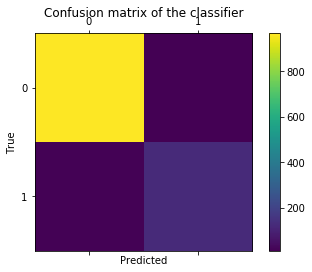

In [25]:
from sklearn.metrics import confusion_matrix
#map({'ham':0, 'spam':1})
labels = [0,1]
cm = confusion_matrix(y_test, preds_NB, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()









# Logistic Regression Classifier

In [26]:
from sklearn.linear_model import LogisticRegression
pip_LR = pip(LogisticRegression())

In [27]:
pip_LR.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [28]:
preds_LR = pip_LR.predict(X_test)

In [29]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,preds_LR))

0.9162415968864254


[[974   2]
 [ 23 116]]


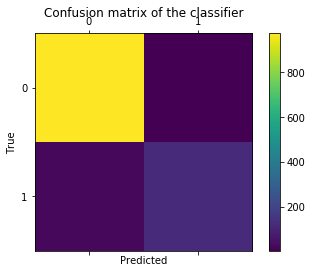

In [30]:
from sklearn.metrics import confusion_matrix
#map({'ham':0, 'spam':1})
labels = [0,1]
cm = confusion_matrix(y_test, preds_LR, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# SVM Classifier

In [31]:
from sklearn.linear_model import SGDClassifier
pip_SVM= pip(SGDClassifier())

In [32]:
pip_SVM.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [33]:
preds_SVM = pip_SVM.predict(X_test)

In [34]:
print(roc_auc_score(y_test,preds_SVM))

0.9671136041986084


[[975   1]
 [  9 130]]


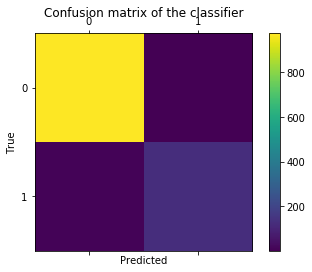

In [35]:
#map({'ham':0, 'spam':1})
labels = [0,1]
cm = confusion_matrix(y_test, preds_SVM, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Decision Tree Classifier

In [36]:
from sklearn import tree
pip_DT=pip(tree.DecisionTreeClassifier())

In [37]:
pip_DT.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [38]:
preds_DT = pip_DT.predict(X_test)

In [39]:
print(roc_auc_score(y_test,preds_DT))

0.9208854228092935


[[962  14]
 [ 20 119]]


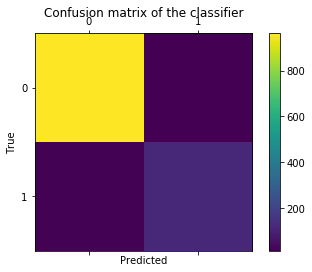

In [40]:
#map({'ham':0, 'spam':1})
labels = [0,1]
cm = confusion_matrix(y_test, preds_DT, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Ensamble Methods Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
pip_EM = pip(RandomForestClassifier())

C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [42]:
pip_EM.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [43]:
preds_EM = pip_EM.predict(X_test)

In [44]:
print(roc_auc_score(y_test,preds_EM))

0.873076129260526


[[974   2]
 [ 35 104]]


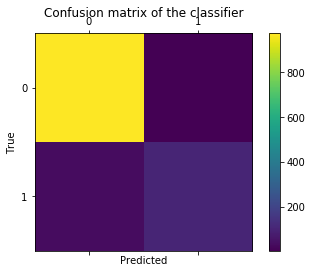

In [45]:
#map({'ham':0, 'spam':1})
labels = [0,1]
cm = confusion_matrix(y_test, preds_EM, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#  Part5: Parameters Tuning with GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters = {'vect__ngram_range': [(1, 2), (2, 3)],
                  'vect__analyzer':['word','char'],
                  'tfidf__use_idf': (True, False),
                  'clf__alpha': (1e-2, 1e-3),
                 }

In [48]:
gs_clf_NB = GridSearchCV(pip(MultinomialNB(fit_prior=False)), parameters, n_jobs=-1)

In [49]:
gs_clf_NB.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...near_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 2), (2, 3)], 'vect__analyzer': ['word', 'char'], 'tfidf__use_idf': (True, False), 'clf__alpha': (0.01, 0.001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
gs_clf_NB.best_params_

{'clf__alpha': 0.001,
 'tfidf__use_idf': True,
 'vect__analyzer': 'char',
 'vect__ngram_range': (2, 3)}

In [51]:
gs_clf_NB.best_score_

0.9877318970676242

In [52]:
gs_clf_SVM = GridSearchCV(pip(SGDClassifier()), parameters, n_jobs=-1)

In [53]:
gs_clf_SVM.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 2), (2, 3)], 'vect__analyzer': ['word', 'char'], 'tfidf__use_idf': (True, False), 'clf__alpha': (0.01, 0.001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
gs_clf_SVM.best_params_

{'clf__alpha': 0.001,
 'tfidf__use_idf': True,
 'vect__analyzer': 'char',
 'vect__ngram_range': (2, 3)}

In [55]:
gs_clf_SVM.best_score_

0.9835427887492519

In [56]:
gs_clf_DT = GridSearchCV(pip(tree.DecisionTreeClassifier()), parameters, n_jobs=-1)

In [57]:
gs_clf_DT.fit(X_train,y_train)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000018EB72E7C00, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3...ges\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\K...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000018EB72E7C00, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3...ges\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\K...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(892, 1)>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(892, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (892, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=892, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'gs_clf_DT.fit(X_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 4, 17, 0, 37, 421397, tzinfo=tzutc()), 'msg_id': '7be3aaa267f8433183d45c127f722cd7', 'msg_type': 'execute_request', 'session': 'cc2492e33c7e413886412d14f382a5f2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7be3aaa267f8433183d45c127f722cd7', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'cc2492e33c7e413886412d14f382a5f2']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'gs_clf_DT.fit(X_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 4, 17, 0, 37, 421397, tzinfo=tzutc()), 'msg_id': '7be3aaa267f8433183d45c127f722cd7', 'msg_type': 'execute_request', 'session': 'cc2492e33c7e413886412d14f382a5f2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7be3aaa267f8433183d45c127f722cd7', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'cc2492e33c7e413886412d14f382a5f2'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'gs_clf_DT.fit(X_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 4, 17, 0, 37, 421397, tzinfo=tzutc()), 'msg_id': '7be3aaa267f8433183d45c127f722cd7', 'msg_type': 'execute_request', 'session': 'cc2492e33c7e413886412d14f382a5f2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7be3aaa267f8433183d45c127f722cd7', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='gs_clf_DT.fit(X_train,y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'gs_clf_DT.fit(X_train,y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('gs_clf_DT.fit(X_train,y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('gs_clf_DT.fit(X_train,y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='gs_clf_DT.fit(X_train,y_train)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'gs_clf_DT.fit(X_train,y_train)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='gs_clf_DT.fit(X_train,y_train)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-57-1515527c3076>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 18ebe9f6048, executio...rue silent=False shell_futures=True> result=None>)
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])
   2906                 code = compiler(mod, cell_name, "single")
-> 2907                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000018EBEA48E40, file "<ipython-input-57-1515527c3076>", line 1>
        result = <ExecutionResult object at 18ebe9f6048, executio...rue silent=False shell_futures=True> result=None>
   2908                     return True
   2909 
   2910             # Flush softspace
   2911             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000018EBEA48E40, file "<ipython-input-57-1515527c3076>", line 1>, result=<ExecutionResult object at 18ebe9f6048, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000018EBEA48E40, file "<ipython-input-57-1515527c3076>", line 1>
        self.user_global_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'EmData':       type                                      ...ue to its name         0

[5572 rows x 3 columns], 'Feat_names': ['00', '000', '008704050406', '0089', '0121', '01223585236', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '050703', '06', '07', '07090201529', '07090298926', '07099833605', ...], 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'X_val[0]', "import pandas as pd\nimport numpy as np\nimport ma...import warnings\nwarnings.filterwarnings('ignore')", "EmData= pd.read_csv('Spam.csv',encoding='cp1252',dtype={'type':np.str, 'Email_body':np.str})", "EmData=EmData[['type','Email_body']]", "EmData['type_num']= EmData.type.map({'ham':0, 'spam':1})", 'y = EmData.type_num\nX = EmData.Email_body', 'from sklearn.cross_validation import train_test_...X_train, y_train, test_size=0.25, random_state=1)', 'X.shape', 'print(X_train.shape,y_train.shape)', 'print(X_test.shape,y_test.shape)', 'print(X_val.shape, y_val.shape)', 'from sklearn.feature_extraction.text import Coun...rn.feature_extraction.text import TfidfVectorizer', 'cv = CountVectorizer()', 'X_train_counts=cv.fit_transform(X_train)', 'X_train_counts.shape', 'tfidf_transformer = TfidfTransformer()\nX_train_t...= tfidf_transformer.fit_transform(X_train_counts)', 'X_train_tfidf.shape', 'tfidf_vect=TfidfVectorizer()\nf= tfidf_vect.fit(X_train)', 'Feat_names= tfidf_vect.get_feature_names()  \nFeat_names', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {8: (5572,), 15: (3342, 6621), 17: (3342, 6621), 19: ['00', '000', '008704050406', '0089', '0121', '01223585236', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '050703', '06', '07', '07090201529', '07090298926', '07099833605', ...], 22: Pipeline(memory=None,
     steps=[('vect', Count...(alpha=1.0, class_prior=None, fit_prior=False))]), 27: Pipeline(memory=None,
     steps=[('vect', Count...0.0001,
          verbose=0, warm_start=False))]), 32: Pipeline(memory=None,
     steps=[('vect', Count...e=True, tol=None, verbose=0, warm_start=False))]), 37: Pipeline(memory=None,
     steps=[('vect', Count...andom_state=None,
            splitter='best'))]), 42: Pipeline(memory=None,
     steps=[('vect', Count...None, verbose=0,
            warm_start=False))]), 49: GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
        self.user_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'EmData':       type                                      ...ue to its name         0

[5572 rows x 3 columns], 'Feat_names': ['00', '000', '008704050406', '0089', '0121', '01223585236', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '050703', '06', '07', '07090201529', '07090298926', '07099833605', ...], 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'X_val[0]', "import pandas as pd\nimport numpy as np\nimport ma...import warnings\nwarnings.filterwarnings('ignore')", "EmData= pd.read_csv('Spam.csv',encoding='cp1252',dtype={'type':np.str, 'Email_body':np.str})", "EmData=EmData[['type','Email_body']]", "EmData['type_num']= EmData.type.map({'ham':0, 'spam':1})", 'y = EmData.type_num\nX = EmData.Email_body', 'from sklearn.cross_validation import train_test_...X_train, y_train, test_size=0.25, random_state=1)', 'X.shape', 'print(X_train.shape,y_train.shape)', 'print(X_test.shape,y_test.shape)', 'print(X_val.shape, y_val.shape)', 'from sklearn.feature_extraction.text import Coun...rn.feature_extraction.text import TfidfVectorizer', 'cv = CountVectorizer()', 'X_train_counts=cv.fit_transform(X_train)', 'X_train_counts.shape', 'tfidf_transformer = TfidfTransformer()\nX_train_t...= tfidf_transformer.fit_transform(X_train_counts)', 'X_train_tfidf.shape', 'tfidf_vect=TfidfVectorizer()\nf= tfidf_vect.fit(X_train)', 'Feat_names= tfidf_vect.get_feature_names()  \nFeat_names', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {8: (5572,), 15: (3342, 6621), 17: (3342, 6621), 19: ['00', '000', '008704050406', '0089', '0121', '01223585236', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '050703', '06', '07', '07090201529', '07090298926', '07099833605', ...], 22: Pipeline(memory=None,
     steps=[('vect', Count...(alpha=1.0, class_prior=None, fit_prior=False))]), 27: Pipeline(memory=None,
     steps=[('vect', Count...0.0001,
          verbose=0, warm_start=False))]), 32: Pipeline(memory=None,
     steps=[('vect', Count...e=True, tol=None, verbose=0, warm_start=False))]), 37: Pipeline(memory=None,
     steps=[('vect', Count...andom_state=None,
            splitter='best'))]), 42: Pipeline(memory=None,
     steps=[('vect', Count...None, verbose=0,
            warm_start=False))]), 49: GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\KBrig\ML-Pipeline\<ipython-input-57-1515527c3076> in <module>()
----> 1 gs_clf_DT.fit(X_train,y_train)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=562     Geeeee ... I love you so much I can bare...a..
Name: Email_body, Length: 3342, dtype: object, y=562     0
3428    0
769     0
3491    0
3270    ...7    0
Name: type_num, Length: 3342, dtype: int64, groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = 562     Geeeee ... I love you so much I can bare...a..
Name: Email_body, Length: 3342, dtype: object
        y = 562     0
3428    0
769     0
3491    0
3270    ...7    0
Name: type_num, Length: 3342, dtype: int64
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Dec  4 12:00:38 2018
PID: 5404Python 3.7.0: C:\Users\KBrig\AppData\Local\Continuum\anaconda3\python.exe
...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('vect', Count...andom_state=None,
            splitter='best'))]), 562     Geeeee ... I love you so much I can bare...a..
Name: Email_body, Length: 3342, dtype: object, 562     0
3428    0
769     0
3491    0
3270    ...7    0
Name: type_num, Length: 3342, dtype: int64, {'score': <function _passthrough_scorer>}, array([1108, 1109, 1110, ..., 3339, 3340, 3341]), array([   0,    1,    2, ..., 1152, 1159, 1166]), 0, {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('vect', Count...andom_state=None,
            splitter='best'))]), 562     Geeeee ... I love you so much I can bare...a..
Name: Email_body, Length: 3342, dtype: object, 562     0
3428    0
769     0
3491    0
3270    ...7    0
Name: type_num, Length: 3342, dtype: int64, {'score': <function _passthrough_scorer>}, array([1108, 1109, 1110, ..., 3339, 3340, 3341]), array([   0,    1,    2, ..., 1152, 1159, 1166]), 0, {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('vect', Count...andom_state=None,
            splitter='best'))]), X=562     Geeeee ... I love you so much I can bare...a..
Name: Email_body, Length: 3342, dtype: object, y=562     0
3428    0
769     0
3491    0
3270    ...7    0
Name: type_num, Length: 3342, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([1108, 1109, 1110, ..., 3339, 3340, 3341]), test=array([   0,    1,    2, ..., 1152, 1159, 1166]), verbose=0, parameters={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me...ndom_state=None,
            splitter='best'))])>
        parameters = {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...andom_state=None,
            splitter='best'))]), **kwargs={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)})
    137 
    138         Returns
    139         -------
    140         self
    141         """
--> 142         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi...ndom_state=None,
            splitter='best'))])>
        kwargs = {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}
    143         return self
    144 
    145     def _validate_steps(self):
    146         names, estimators = zip(*self.steps)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...andom_state=None,
            splitter='best'))]), attr='steps', **params={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me...ndom_state=None,
            splitter='best'))])>
        params = {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py in set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...andom_state=None,
            splitter='best'))]), **params={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)})
    277                 nested_params[key][sub_key] = value
    278             else:
    279                 setattr(self, key, value)
    280 
    281         for key, sub_params in nested_params.items():
--> 282             valid_params[key].set_params(**sub_params)
        valid_params = {'clf': DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), 'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': None, 'clf__max_leaf_nodes': None, 'clf__min_impurity_decrease': 0.0, 'clf__min_impurity_split': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, ...}
        key.set_params = undefined
        sub_params = {'alpha': 0.01}
    283 
    284         return self
    285 
    286     def __repr__(self):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py in set_params(self=DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), **params={'alpha': 0.01})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'alpha'
        self = DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best')
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter alpha for estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [58]:
gs_clf_EM = GridSearchCV(pip(RandomForestClassifier()), parameters, n_jobs=-1)

In [59]:
gs_clf_EM.fit(X_train,y_train)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000018EB72E7C00, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3...ges\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\K...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000018EB72E7C00, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3...ges\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\K...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(892, 1)>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(892, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (892, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=892, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'gs_clf_EM.fit(X_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 4, 17, 0, 57, 315089, tzinfo=tzutc()), 'msg_id': 'ff21128ba0e54951aa0ed04e44d5aae1', 'msg_type': 'execute_request', 'session': 'cc2492e33c7e413886412d14f382a5f2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ff21128ba0e54951aa0ed04e44d5aae1', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'cc2492e33c7e413886412d14f382a5f2']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'gs_clf_EM.fit(X_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 4, 17, 0, 57, 315089, tzinfo=tzutc()), 'msg_id': 'ff21128ba0e54951aa0ed04e44d5aae1', 'msg_type': 'execute_request', 'session': 'cc2492e33c7e413886412d14f382a5f2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ff21128ba0e54951aa0ed04e44d5aae1', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'cc2492e33c7e413886412d14f382a5f2'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'gs_clf_EM.fit(X_train,y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 4, 17, 0, 57, 315089, tzinfo=tzutc()), 'msg_id': 'ff21128ba0e54951aa0ed04e44d5aae1', 'msg_type': 'execute_request', 'session': 'cc2492e33c7e413886412d14f382a5f2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ff21128ba0e54951aa0ed04e44d5aae1', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='gs_clf_EM.fit(X_train,y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'gs_clf_EM.fit(X_train,y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('gs_clf_EM.fit(X_train,y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('gs_clf_EM.fit(X_train,y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='gs_clf_EM.fit(X_train,y_train)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'gs_clf_EM.fit(X_train,y_train)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='gs_clf_EM.fit(X_train,y_train)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-59-6559b1e59f2b>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 18ebf1031d0, executio...rue silent=False shell_futures=True> result=None>)
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])
   2906                 code = compiler(mod, cell_name, "single")
-> 2907                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000018EBEA48F60, file "<ipython-input-59-6559b1e59f2b>", line 1>
        result = <ExecutionResult object at 18ebf1031d0, executio...rue silent=False shell_futures=True> result=None>
   2908                     return True
   2909 
   2910             # Flush softspace
   2911             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000018EBEA48F60, file "<ipython-input-59-6559b1e59f2b>", line 1>, result=<ExecutionResult object at 18ebf1031d0, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000018EBEA48F60, file "<ipython-input-59-6559b1e59f2b>", line 1>
        self.user_global_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'EmData':       type                                      ...ue to its name         0

[5572 rows x 3 columns], 'Feat_names': ['00', '000', '008704050406', '0089', '0121', '01223585236', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '050703', '06', '07', '07090201529', '07090298926', '07099833605', ...], 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'X_val[0]', "import pandas as pd\nimport numpy as np\nimport ma...import warnings\nwarnings.filterwarnings('ignore')", "EmData= pd.read_csv('Spam.csv',encoding='cp1252',dtype={'type':np.str, 'Email_body':np.str})", "EmData=EmData[['type','Email_body']]", "EmData['type_num']= EmData.type.map({'ham':0, 'spam':1})", 'y = EmData.type_num\nX = EmData.Email_body', 'from sklearn.cross_validation import train_test_...X_train, y_train, test_size=0.25, random_state=1)', 'X.shape', 'print(X_train.shape,y_train.shape)', 'print(X_test.shape,y_test.shape)', 'print(X_val.shape, y_val.shape)', 'from sklearn.feature_extraction.text import Coun...rn.feature_extraction.text import TfidfVectorizer', 'cv = CountVectorizer()', 'X_train_counts=cv.fit_transform(X_train)', 'X_train_counts.shape', 'tfidf_transformer = TfidfTransformer()\nX_train_t...= tfidf_transformer.fit_transform(X_train_counts)', 'X_train_tfidf.shape', 'tfidf_vect=TfidfVectorizer()\nf= tfidf_vect.fit(X_train)', 'Feat_names= tfidf_vect.get_feature_names()  \nFeat_names', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {8: (5572,), 15: (3342, 6621), 17: (3342, 6621), 19: ['00', '000', '008704050406', '0089', '0121', '01223585236', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '050703', '06', '07', '07090201529', '07090298926', '07099833605', ...], 22: Pipeline(memory=None,
     steps=[('vect', Count...(alpha=1.0, class_prior=None, fit_prior=False))]), 27: Pipeline(memory=None,
     steps=[('vect', Count...0.0001,
          verbose=0, warm_start=False))]), 32: Pipeline(memory=None,
     steps=[('vect', Count...e=True, tol=None, verbose=0, warm_start=False))]), 37: Pipeline(memory=None,
     steps=[('vect', Count...andom_state=None,
            splitter='best'))]), 42: Pipeline(memory=None,
     steps=[('vect', Count...None, verbose=0,
            warm_start=False))]), 49: GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
        self.user_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'EmData':       type                                      ...ue to its name         0

[5572 rows x 3 columns], 'Feat_names': ['00', '000', '008704050406', '0089', '0121', '01223585236', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '050703', '06', '07', '07090201529', '07090298926', '07099833605', ...], 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'X_val[0]', "import pandas as pd\nimport numpy as np\nimport ma...import warnings\nwarnings.filterwarnings('ignore')", "EmData= pd.read_csv('Spam.csv',encoding='cp1252',dtype={'type':np.str, 'Email_body':np.str})", "EmData=EmData[['type','Email_body']]", "EmData['type_num']= EmData.type.map({'ham':0, 'spam':1})", 'y = EmData.type_num\nX = EmData.Email_body', 'from sklearn.cross_validation import train_test_...X_train, y_train, test_size=0.25, random_state=1)', 'X.shape', 'print(X_train.shape,y_train.shape)', 'print(X_test.shape,y_test.shape)', 'print(X_val.shape, y_val.shape)', 'from sklearn.feature_extraction.text import Coun...rn.feature_extraction.text import TfidfVectorizer', 'cv = CountVectorizer()', 'X_train_counts=cv.fit_transform(X_train)', 'X_train_counts.shape', 'tfidf_transformer = TfidfTransformer()\nX_train_t...= tfidf_transformer.fit_transform(X_train_counts)', 'X_train_tfidf.shape', 'tfidf_vect=TfidfVectorizer()\nf= tfidf_vect.fit(X_train)', 'Feat_names= tfidf_vect.get_feature_names()  \nFeat_names', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {8: (5572,), 15: (3342, 6621), 17: (3342, 6621), 19: ['00', '000', '008704050406', '0089', '0121', '01223585236', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '050703', '06', '07', '07090201529', '07090298926', '07099833605', ...], 22: Pipeline(memory=None,
     steps=[('vect', Count...(alpha=1.0, class_prior=None, fit_prior=False))]), 27: Pipeline(memory=None,
     steps=[('vect', Count...0.0001,
          verbose=0, warm_start=False))]), 32: Pipeline(memory=None,
     steps=[('vect', Count...e=True, tol=None, verbose=0, warm_start=False))]), 37: Pipeline(memory=None,
     steps=[('vect', Count...andom_state=None,
            splitter='best'))]), 42: Pipeline(memory=None,
     steps=[('vect', Count...None, verbose=0,
            warm_start=False))]), 49: GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\KBrig\ML-Pipeline\<ipython-input-59-6559b1e59f2b> in <module>()
----> 1 gs_clf_EM.fit(X_train,y_train)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=562     Geeeee ... I love you so much I can bare...a..
Name: Email_body, Length: 3342, dtype: object, y=562     0
3428    0
769     0
3491    0
3270    ...7    0
Name: type_num, Length: 3342, dtype: int64, groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = 562     Geeeee ... I love you so much I can bare...a..
Name: Email_body, Length: 3342, dtype: object
        y = 562     0
3428    0
769     0
3491    0
3270    ...7    0
Name: type_num, Length: 3342, dtype: int64
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Dec  4 12:00:58 2018
PID: 1892Python 3.7.0: C:\Users\KBrig\AppData\Local\Continuum\anaconda3\python.exe
...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('vect', Count...None, verbose=0,
            warm_start=False))]), 562     Geeeee ... I love you so much I can bare...a..
Name: Email_body, Length: 3342, dtype: object, 562     0
3428    0
769     0
3491    0
3270    ...7    0
Name: type_num, Length: 3342, dtype: int64, {'score': <function _passthrough_scorer>}, array([1108, 1109, 1110, ..., 3339, 3340, 3341]), array([   0,    1,    2, ..., 1152, 1159, 1166]), 0, {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('vect', Count...None, verbose=0,
            warm_start=False))]), 562     Geeeee ... I love you so much I can bare...a..
Name: Email_body, Length: 3342, dtype: object, 562     0
3428    0
769     0
3491    0
3270    ...7    0
Name: type_num, Length: 3342, dtype: int64, {'score': <function _passthrough_scorer>}, array([1108, 1109, 1110, ..., 3339, 3340, 3341]), array([   0,    1,    2, ..., 1152, 1159, 1166]), 0, {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('vect', Count...None, verbose=0,
            warm_start=False))]), X=562     Geeeee ... I love you so much I can bare...a..
Name: Email_body, Length: 3342, dtype: object, y=562     0
3428    0
769     0
3491    0
3270    ...7    0
Name: type_num, Length: 3342, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([1108, 1109, 1110, ..., 3339, 3340, 3341]), test=array([   0,    1,    2, ..., 1152, 1159, 1166]), verbose=0, parameters={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me...one, verbose=0,
            warm_start=False))])>
        parameters = {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...None, verbose=0,
            warm_start=False))]), **kwargs={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)})
    137 
    138         Returns
    139         -------
    140         self
    141         """
--> 142         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi...one, verbose=0,
            warm_start=False))])>
        kwargs = {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}
    143         return self
    144 
    145     def _validate_steps(self):
    146         names, estimators = zip(*self.steps)

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...None, verbose=0,
            warm_start=False))]), attr='steps', **params={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me...one, verbose=0,
            warm_start=False))])>
        params = {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py in set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...None, verbose=0,
            warm_start=False))]), **params={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)})
    277                 nested_params[key][sub_key] = value
    278             else:
    279                 setattr(self, key, value)
    280 
    281         for key, sub_params in nested_params.items():
--> 282             valid_params[key].set_params(**sub_params)
        valid_params = {'clf': RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), 'clf__bootstrap': True, 'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': 'auto', 'clf__max_leaf_nodes': None, 'clf__min_impurity_decrease': 0.0, 'clf__min_impurity_split': None, 'clf__min_samples_leaf': 1, ...}
        key.set_params = undefined
        sub_params = {'alpha': 0.01}
    283 
    284         return self
    285 
    286     def __repr__(self):

...........................................................................
C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py in set_params(self=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), **params={'alpha': 0.01})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'alpha'
        self = RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False)
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter alpha for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [60]:
gs_clf_SVM_final = GridSearchCV(pip(SGDClassifier()), parameters={'clf__alpha': 0.001,
 'tfidf__use_idf': True,
 'vect__analyzer': 'char',
 'vect__ngram_range': (2, 3)}, n_jobs=-1)

TypeError: __init__() got an unexpected keyword argument 'parameters'

In [61]:
def pip1(classifier):
    pipeline = Pipeline([
        ('vect', CountVectorizer(analyzer='char', ngram_range=(2,3))),  # strings to token integer counts
        ('tfidf', TfidfTransformer(use_idf=True)),  # integer counts to weighted TF-IDF scores
        ('clf', classifier),
    ])
    return(pipeline)

In [92]:
gs_clf_SVM_final=pip1(SGDClassifier(alpha=0.001))

In [93]:
gs_clf_SVM_final.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 3), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [94]:
SVMfinalPreds = gs_clf_SVM_final.predict(X_test)

In [95]:
print(roc_auc_score(y_test,SVMfinalPreds))

0.9496402877697842


In [96]:
gs_clf_SVM_final.predict(["U've been selected to stay in 1 of 250 top British hotels - FOR NOTHING! Holiday valued at å£350! Dial 08712300220 to claim - National Rate Call. Bx526, SW73SS"])

array([1], dtype=int64)

In [ ]:
Part6: Model Sa

In [100]:
import dill as pickle
from sklearn.externals import joblib

if __name__ == '__main__':
    model = gs_clf_SVM_final
    filename = 'model_SVMFinal.pk'
    with open('C:/Users/KBrig/ML-Pipeline/models'+filename, 'wb') as file:
        pickle.dump(model, file)